In [27]:
import numpy as np
import pandas as pd
import os
import shutil
import random
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
print(os.listdir('../../Dataset/monkey_dataset'))

['monkey_labels.txt', 'training', 'validation']


In [3]:
root = '../../Dataset/monkey_dataset'
train_dir =  f'{root}/training/training/'
val_dir = f'{root}/validation/validatoin/'
index_file = f'{root}/monkey_labels.txt'

In [19]:
os.makedirs('../../Dataset/monkey_dataset/training200/', exist_ok=True) # Create folders for 200 images
root200 = '../../Dataset/monkey_dataset/training200/'
folders = ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']
for folder in folders:
    os.makedirs(os.path.join(root200, folder), exist_ok=True) # can use mkdir instead 

In [28]:
for i in range(10):
    src = train_dir + 'n' + str(i)
    # print (src)
    src_files = random.sample(os.listdir(src), 20)
    # print(src_files)
    for file in src_files:
        src_dir = os.path.join(src, file)
        shutil.copy(src_dir, root200 + 'n' + str(i))

In [34]:
print(os.listdir(root200 + 'n0'))  # check the images in training200/n0

['n0021.jpg', 'n0028.jpg', 'n0033.jpg', 'n0037.jpg', 'n0038.jpg', 'n0051.jpg', 'n0113.jpg', 'n0117.jpg', 'n0123.jpg', 'n0128.jpg', 'n0137.jpg', 'n0145.jpg', 'n0148.jpg', 'n0150.jpg', 'n0153.jpg', 'n0162.jpg', 'n0164.jpg', 'n0165.jpg', 'n0169.jpg', 'n0172.jpg']


In [35]:
index_df = pd.read_csv(index_file)
index_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [37]:
print(index_df.columns)
index_df[" Common Name                   "] # have to create new columns name

Index(['Label', '  Latin Name           ', ' Common Name                   ',
       ' Train Images ', ' Validation Images'],
      dtype='object')


0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name:  Common Name                   , dtype: object

In [38]:
cols = ['Label', 'Latin Name', 'Common Name', 'Train Images', 'Validation Images']
index_df = pd.read_csv(index_file, names=cols, skiprows=1)
index_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [39]:
index_df["Common Name"]

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 36, 36, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 256)      

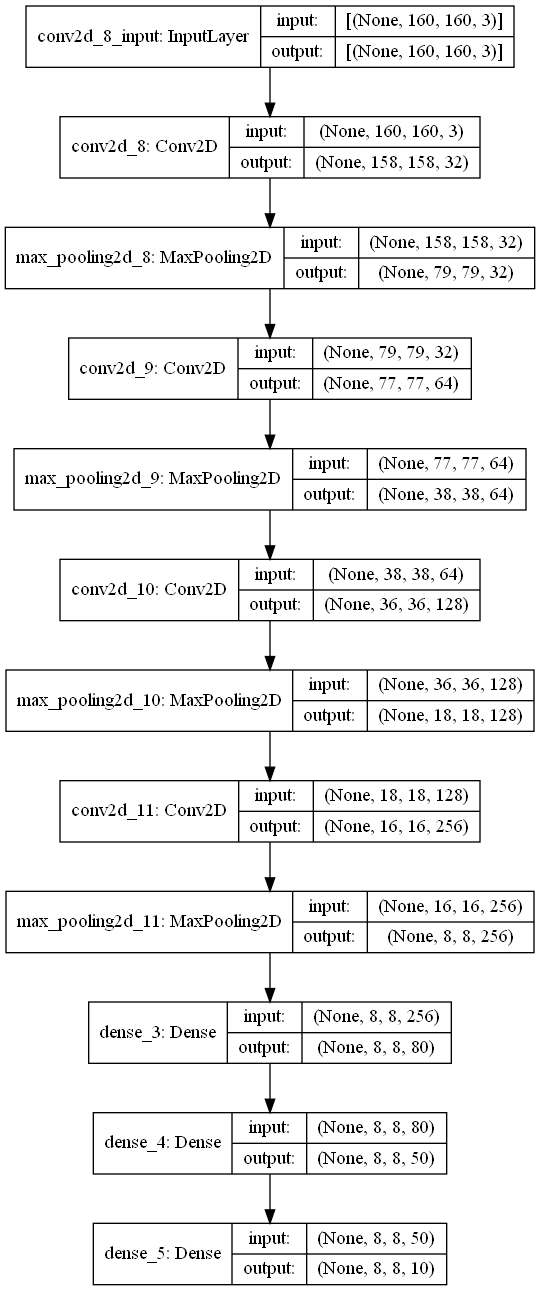

In [72]:
from tensorflow.keras.utils import plot_model
# Define the CNN model
model = Sequential()

image_size = 160
model.add(Conv2D(32, (3,3), input_shape=(image_size, image_size, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides = 2))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2), strides = 2))

model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2), strides = 2))

model.add(Conv2D(256, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2), strides = 2))

neurons = 80
model.add(Dense(units=neurons, activation = 'relu'))
model.add(Dense(units= 50, activation = 'relu'))
model.add(Dense(units= 10, activation = 'softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

plot_model(model, to_file='model.png', show_shapes=True)
